In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
import io
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import datetime
import nltk
#from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('nba2k20-full.csv')

In [3]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [4]:
X = df.drop(['salary','draft_peak','jersey','draft_year'],axis=1)
Y = df['salary']

In [5]:
tw2 = str(Y.iloc[0])
tw2 = tw2.replace('$','')
type(tw2)

str

In [6]:
for i in range(Y.shape[0]):
    tw2 = str(Y.iloc[i])
    tw2 = tw2.replace('$','')
    Y.iloc[i] = int(tw2)

In [7]:
for i in range(X.shape[0]):
    tw2 = str(X['b_day'].iloc[i])
    tw2 = tw2.replace('/',' ')
    word_tokens = word_tokenize(tw2)
    tw2 = word_tokens[-1]
    if int(tw2)<21:
        age = int(21-int(tw2))
    else:
        age = int((100-int(tw2))+20)
    X['b_day'].iloc[i] = age
X = X.rename(columns={'b_day':'age'})
X.head()

,full_name,rating,team,position,age,height,weight,country,draft_round,college
0,LeBron James,97,Los Angeles Lakers,F,36,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,1,NaN
1,Kawhi Leonard,97,Los Angeles Clippers,F,29,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,1,San Diego State
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,26,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,1,NaN
3,Kevin Durant,96,Brooklyn Nets,F,32,6-10 / 2.08,230 lbs. / 104.3 kg.,USA,1,Texas
4,James Harden,96,Houston Rockets,G,31,6-5 / 1.96,220 lbs. / 99.8 kg.,USA,1,Arizona State


26.85780885780886


Text(0.5, 1.0, 'NBA Player age distributions as of 2020')

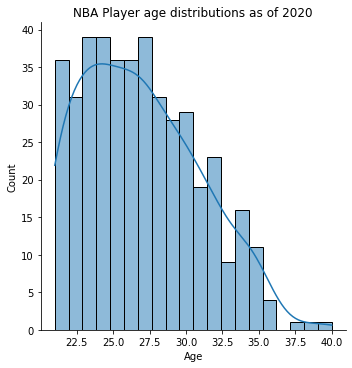

In [8]:
print(X['age'].mean())
sns.displot(X['age'],bins=20,kde=True)
plt.xlabel("Age")
plt.title('NBA Player age distributions as of 2020')

In [9]:
X.head()

,full_name,rating,team,position,age,height,weight,country,draft_round,college
0,LeBron James,97,Los Angeles Lakers,F,36,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,1,NaN
1,Kawhi Leonard,97,Los Angeles Clippers,F,29,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,1,San Diego State
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,26,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,1,NaN
3,Kevin Durant,96,Brooklyn Nets,F,32,6-10 / 2.08,230 lbs. / 104.3 kg.,USA,1,Texas
4,James Harden,96,Houston Rockets,G,31,6-5 / 1.96,220 lbs. / 99.8 kg.,USA,1,Arizona State


In [10]:
for i in range(X.shape[0]):
    tw2 = str(X['height'].iloc[i])
    tw2 = tw2.replace('/',' ')
    word_tokens = word_tokenize(tw2)
    tw2 = word_tokens[-1]
    height = float(tw2)
    X['height'].iloc[i] = height
X = X.rename(columns={'height':'height in m'})
X.head()

,full_name,rating,team,position,age,height in m,weight,country,draft_round,college
0,LeBron James,97,Los Angeles Lakers,F,36,2.06,250 lbs. / 113.4 kg.,USA,1,NaN
1,Kawhi Leonard,97,Los Angeles Clippers,F,29,2.01,225 lbs. / 102.1 kg.,USA,1,San Diego State
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,26,2.11,242 lbs. / 109.8 kg.,Greece,1,NaN
3,Kevin Durant,96,Brooklyn Nets,F,32,2.08,230 lbs. / 104.3 kg.,USA,1,Texas
4,James Harden,96,Houston Rockets,G,31,1.96,220 lbs. / 99.8 kg.,USA,1,Arizona State


1.9956410256410246


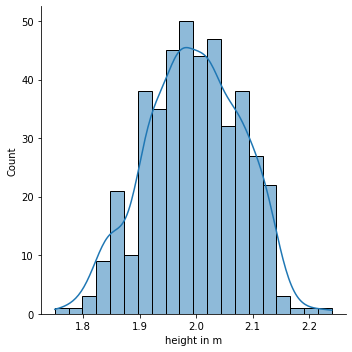

In [11]:
print(X['height in m'].mean())
sns.displot(X['height in m'],bins=20,kde=True)


Text(0.5, 1.0, 'height by position')

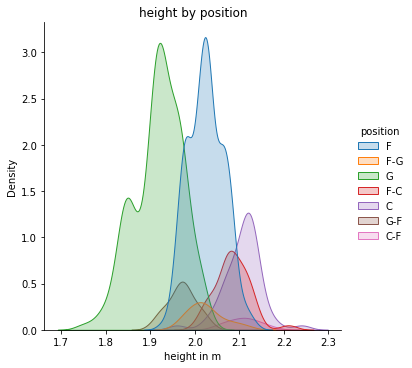

In [12]:
sns.displot(data=X, x='height in m',hue='position',kind='kde',fill=True,)
plt.title('height by position')

Text(0.5, 1.0, 'age by position')

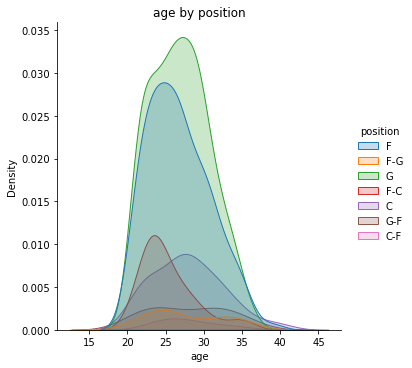

In [13]:
sns.displot(data=X, x='age',hue='position',kind='kde',fill=True,)
plt.title('age by position')

In [14]:
for i in range(X.shape[0]):
    tw2 = str(X['weight'].iloc[i])
    tw2 = tw2.replace('/',' ')
    word_tokens = word_tokenize(tw2)
    tw2 = word_tokens[-3]
    weight = float(tw2)
    X['weight'].iloc[i] = weight
X = X.rename(columns={'weight':'weight in kg'})
X.head()

,full_name,rating,team,position,age,height in m,weight in kg,country,draft_round,college
0,LeBron James,97,Los Angeles Lakers,F,36,2.06,113.4,USA,1,NaN
1,Kawhi Leonard,97,Los Angeles Clippers,F,29,2.01,102.1,USA,1,San Diego State
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,26,2.11,109.8,Greece,1,NaN
3,Kevin Durant,96,Brooklyn Nets,F,32,2.08,104.3,USA,1,Texas
4,James Harden,96,Houston Rockets,G,31,1.96,99.8,USA,1,Arizona State


In [15]:
X.college = X.college.fillna('other')

In [16]:
X['team'].value_counts()

Milwaukee Bucks           17
Phoenix Suns              16
Chicago Bulls             15
Los Angeles Lakers        15
Dallas Mavericks          15
Indiana Pacers            15
New York Knicks           15
New Orleans Pelicans      15
Orlando Magic             15
Brooklyn Nets             14
Sacramento Kings          14
Philadelphia 76ers        14
San Antonio Spurs         14
Detroit Pistons           14
Boston Celtics            14
Los Angeles Clippers      14
Minnesota Timberwolves    13
Houston Rockets           13
Oklahoma City Thunder     13
Washington Wizards        13
Memphis Grizzlies         13
Denver Nuggets            13
Toronto Raptors           13
Miami Heat                12
Cleveland Cavaliers       12
Portland Trail Blazers    12
Utah Jazz                 12
Atlanta Hawks             12
Charlotte Hornets         10
Golden State Warriors      9
Name: team, dtype: int64

In [17]:
#team_encoded=pd.get_dummies(X['team'])

In [18]:
#X = pd.concat([X, team_encoded], axis=1)
#X = X.drop(['team'],axis=1)

In [19]:
#X.head()

In [20]:
#country_encoded=pd.get_dummies(X['country'])

In [21]:
#X = pd.concat([X, country_encoded], axis=1)
#X = X.drop(['country'],axis=1)

In [22]:
#X = X.drop(['college','full_name'],axis=1)

In [23]:
position_encoded=pd.get_dummies(X['position'])
X = pd.concat([X, position_encoded], axis=1)
X = X.drop(['position'],axis=1)

In [24]:
X.head()

,full_name,rating,team,age,height in m,weight in kg,country,draft_round,college,C,C-F,F,F-C,F-G,G,G-F
0,LeBron James,97,Los Angeles Lakers,36,2.06,113.4,USA,1,other,0,0,1,0,0,0,0
1,Kawhi Leonard,97,Los Angeles Clippers,29,2.01,102.1,USA,1,San Diego State,0,0,1,0,0,0,0
2,Giannis Antetokounmpo,96,Milwaukee Bucks,26,2.11,109.8,Greece,1,other,0,0,0,0,1,0,0
3,Kevin Durant,96,Brooklyn Nets,32,2.08,104.3,USA,1,Texas,0,0,1,0,0,0,0
4,James Harden,96,Houston Rockets,31,1.96,99.8,USA,1,Arizona State,0,0,0,0,0,1,0


In [25]:
X.dtypes

full_name       object
rating           int64
team            object
age             object
height in m     object
weight in kg    object
country         object
draft_round     object
college         object
C                uint8
C-F              uint8
F                uint8
F-C              uint8
F-G              uint8
G                uint8
G-F              uint8
dtype: object

In [26]:
X = X.astype({'age': 'int32','height in m':'float64','weight in kg':'int32'})

In [27]:
X['draft_round'] = X['draft_round'].map({'1': 1, '2': 2,'Undrafted': 3})

In [51]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,Arizona State


In [29]:
X = X.drop(['full_name','team','college','country'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.neural_network import MLPRegressor

In [31]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [62]:
X = np.array(X)
Y = np.array(Y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

In [64]:
regr = svm.SVR()
regr.fit(X_train, y_train)
yhat = regr.predict(X_test)

In [65]:
mean_absolute_error(y_test, yhat)

6335869.939646219

In [66]:
regr = MLPRegressor(hidden_layer_sizes=(10,3), max_iter=500).fit(X_train, y_train)
regr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 3), max_iter=500)

In [67]:
yhat = regr.predict(X_test)

In [68]:
mean_absolute_error(y_test, yhat)

8174043.363905653

In [69]:
yhat

array([5728.84156153, 6422.46571493, 6289.91050253, 6170.23473725,
       6615.51568317, 6114.28462481, 6200.36467948, 6165.57438166,
       6940.37466491, 6652.05392387, 6406.13595405, 6378.24169524,
       6197.23545846, 6587.32410581, 6672.20293853, 6732.34512114,
       6547.03972029, 5886.10806933, 6423.73941866, 5888.0406481 ,
       6250.39477201, 6863.2214045 , 6376.83471802, 5764.49630711,
       6037.08371988, 5943.60979897, 7461.13556588, 6963.87876015,
       6890.40966121, 6767.8361054 , 6164.79725776, 6166.57931173,
       5858.743526  , 6673.8131067 , 6896.30602346, 6293.06250401,
       6818.34138139, 6071.84510673, 6271.8136897 , 5977.2214537 ,
       6845.49061988, 5878.96085298, 6197.95858101, 7044.33945904,
       6423.96939855, 6435.67335175, 6863.72585606, 6163.99317672,
       6813.82182305, 6546.5523875 , 6107.10422369, 6898.79630552,
       6041.20864298, 6172.03615351, 6310.86061688, 6413.63939767,
       5941.86425781, 7554.26103638, 7146.22398251, 7430.85115

In [71]:
y_test[0]

2475840

In [72]:
yhat[0]

5728.84156152843